# Logistic Regression

- Model the probability of certain event
- Binary Classification
- Uses Sigmoid Function: An activation function with a threshold


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model

In [ ]:
iris = datasets.load_iris()
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = iris.data[:, 0]
y_org = iris.target!=2
y = iris.target[y_org]
X = X[y_org]

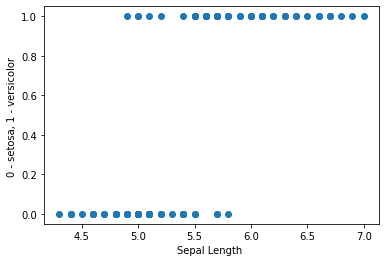

In [ ]:
plt.scatter(X, y)
plt.xlabel('Sepal Length ', fontsize=10)
plt.ylabel('0 - setosa, 1 - versicolor ', fontsize=10)
plt.show()

In [ ]:
X = np.c_[np.ones((X.shape[0],1)), X[:]]
y = y.reshape(-1,1)
alpha = 0.1
m = y.size
np.random.seed(10)
theta = np.random.rand(2)
theta = theta.reshape(-1,1)

In [ ]:
def gradient_descent(x, y, m, theta,  alpha):
    cost_list = []
    theta_list = []
    prediction_list = []
    run = True
    cost_list.append(1e10)
    i=0
    while run:
        
        # Hypo
        Z = np.dot(x, theta)
        
        # Sigmoid 
        prediction = 1 / (1 + np.exp(-Z))
        prediction_list.append(prediction)
        
        # Cost
        error = prediction - y
        cost = np.sum(-(y * np.log(prediction) + (1 - y) * np.log(1 - prediction))) / m
        cost_list.append(cost)
        
        #Gradient
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-5:
            run = False
        if i>=500:
            run = False
        i+=1
    cost_list.pop(0)
    return prediction_list, cost_list, theta_list

In [ ]:
prediction_list, cost_list, theta_list = gradient_descent(X, y, m, theta, alpha)
theta = theta_list[-1]

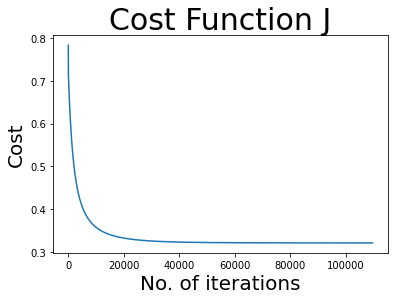

In [ ]:
plt.title('Cost', size = 30)
plt.xlabel('Iter', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [ ]:
theta

array([[-27.53475787],
       [  5.08546084]])

In [ ]:
for i in range(prediction_list[-1].shape[0]):
  if prediction_list[-1][i]<0.5:
    prediction_list[-1][i]=0
  else:
    prediction_list[-1][i]=1

In [ ]:
acc = ((prediction_list[-1] == y).sum() / y.shape[0])*100
print(acc)

89.0
